In [139]:
#Imports
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [140]:
#Read in the training data
train_data = pd.read_csv('/Users/tapaswinck/Desktop/Kaggle/playground-series-s5e1/train.csv')
train_data.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [141]:
train_data.country.unique()

array(['Canada', 'Finland', 'Italy', 'Kenya', 'Norway', 'Singapore'],
      dtype=object)

In [142]:
train_data.store.unique()

array(['Discount Stickers', 'Stickers for Less', 'Premium Sticker Mart'],
      dtype=object)

In [143]:
train_data['product'].unique()

array(['Holographic Goose', 'Kaggle', 'Kaggle Tiers', 'Kerneler',
       'Kerneler Dark Mode'], dtype=object)

In [144]:
#Read in the test data
test_data = pd.read_csv('/Users/tapaswinck/Desktop/Kaggle/playground-series-s5e1/test.csv')
test_data.head()

,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode


In [145]:
#Mapping for country
country_map = {
    'Canada' : 0,
    'Finland' : 1,
    'Italy' : 2,
    'Kenya' : 3,
    'Norway' : 4,
    'Singapore' : 5
}

#Mapping for store
store_map = {
    'Discount Stickers' : 0,
    'Stickers for Less' : 1,
    'Premium Sticker Mart' : 2
}

#Map for product
product_map = {
    'Holographic Goose' : 0,
    'Kaggle' : 1,
    'Kaggle Tiers' : 2,
    'Kerneler' : 3,
    'Kerneler Dark Mode' : 4,
}   

#Apply the mapping to training data
train_data['country'] = train_data['country'].map(country_map)
train_data['store'] = train_data['store'].map(store_map)
train_data['product'] = train_data['product'].map(product_map)

#Apply the mapping to test data
test_data['country'] = test_data['country'].map(country_map)
test_data['store'] = test_data['store'].map(store_map)
test_data['product'] = test_data['product'].map(product_map)

In [146]:
train_data.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,0,0,0,NaN
1,1,2010-01-01,0,0,1,973.0
2,2,2010-01-01,0,0,2,906.0
3,3,2010-01-01,0,0,3,423.0
4,4,2010-01-01,0,0,4,491.0


In [147]:
train_data.fillna(0, inplace=True)

In [148]:
train_data.isnull().sum()

id          0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [149]:
test_data.isna().sum()

id         0
date       0
country    0
store      0
product    0
dtype: int64

In [150]:
test_data.head()

,id,date,country,store,product
0,230130,2017-01-01,0,0,0
1,230131,2017-01-01,0,0,1
2,230132,2017-01-01,0,0,2
3,230133,2017-01-01,0,0,3
4,230134,2017-01-01,0,0,4


In [151]:
#Begin Preprocessing
#Dropping  the num_sold column
y = train_data['num_sold']
X = train_data.drop(columns=['num_sold'])

In [152]:
#Setting date colun as index
X.set_index('date', inplace=True)

In [153]:
X.head()

,id,country,store,product
date,,,,
2010-01-01,0,0,0,0
2010-01-01,1,0,0,1
2010-01-01,2,0,0,2
2010-01-01,3,0,0,3
2010-01-01,4,0,0,4


In [154]:
y.head()

0      0.0
1    973.0
2    906.0
3    423.0
4    491.0
Name: num_sold, dtype: float64

<Axes: title={'center': 'Sales Time Series'}>

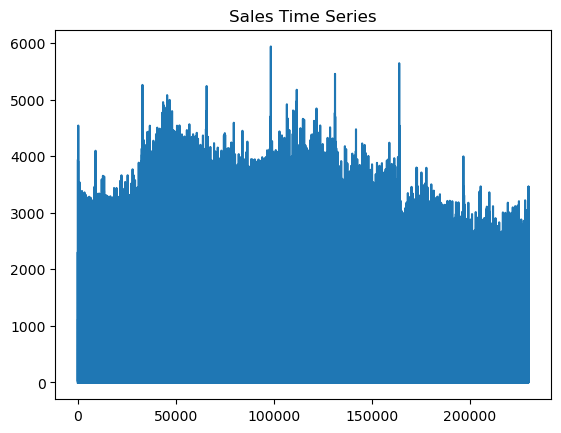

In [155]:
#Plot time series for num_sold
y.plot(title = 'Sales Time Series')


In [156]:
model = ARIMA(y, order=(5,1,0))
model_fit = model.fit()
# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               num_sold   No. Observations:               230130
Model:                 ARIMA(5, 1, 0)   Log Likelihood            -1726035.050
Date:                Wed, 22 Jan 2025   AIC                        3452082.099
Time:                        15:38:18   BIC                        3452144.178
Sample:                             0   HQIC                       3452100.260
                             - 230130                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2449      0.003    -92.626      0.000      -0.250      -0.240
ar.L2         -0.2381      0.002   -116.300      0.000      -0.242      -0.234
ar.L3         -0.2042      0.002    -82.851      0.0

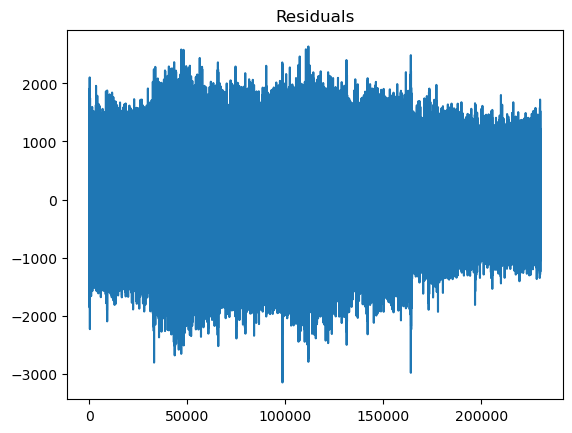

Forecasted Values:
230130     653.069285
230131    2473.689838
230132    2222.235411
230133    1377.802366
230134    1792.219459
             ...     
230325    1690.126103
230326    1690.666172
230327    1689.902433
230328    1690.570346
230329    1690.257456
Name: predicted_mean, Length: 200, dtype: float64


In [157]:
# Plot residuals
residuals = model_fit.resid
residuals.plot(title="Residuals")
plt.show()

# Forecast
forecast = model_fit.forecast(steps=200)  # Forecast next 5 steps
print("Forecasted Values:")
print(forecast)


In [158]:
# Forecast for test data
forecast_steps = len(test_data)  # Number of future steps to predict
forecast = model_fit.forecast(steps=forecast_steps)

# Add predictions to test_df
test_data['num_sold'] = forecast.values

print("Test Data with Predictions:")
print(test_data)

Test Data with Predictions:
           id        date  country  store  product     num_sold
0      230130  2017-01-01        0      0        0   653.069285
1      230131  2017-01-01        0      0        1  2473.689838
2      230132  2017-01-01        0      0        2  2222.235411
3      230133  2017-01-01        0      0        3  1377.802366
4      230134  2017-01-01        0      0        4  1792.219459
...       ...         ...      ...    ...      ...          ...
98545  328675  2019-12-31        5      2        0  1690.300455
98546  328676  2019-12-31        5      2        1  1690.300455
98547  328677  2019-12-31        5      2        2  1690.300455
98548  328678  2019-12-31        5      2        3  1690.300455
98549  328679  2019-12-31        5      2        4  1690.300455

[98550 rows x 6 columns]


In [159]:
reversed_store_map = {v: k for k, v in store_map.items()}
reversed_country_map = {v: k for k, v in country_map.items()}
reversed_product_map = {v: k for k, v in product_map.items()}

test_data['store'] = test_data['store'].map(reversed_store_map)
test_data['country'] = test_data['country'].map(reversed_country_map)
test_data['product'] = test_data['product'].map(reversed_product_map)

In [160]:
test_data.head()

,id,date,country,store,product,num_sold
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose,653.069285
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle,2473.689838
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers,2222.235411
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler,1377.802366
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode,1792.219459


In [161]:
output = pd.concat([test_data['id'], test_data['num_sold']], axis=1)
output['num_sold'] = round(output['num_sold'])

In [162]:
output

,id,num_sold
0,230130,653.0
1,230131,2474.0
2,230132,2222.0
3,230133,1378.0
4,230134,1792.0
...,...,...
98545,328675,1690.0
98546,328676,1690.0
98547,328677,1690.0
98548,328678,1690.0


In [163]:
output.to_csv('output.csv', index=False, header=True)